In [26]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [10]:
# Load datasets
df_customer = pd.read_csv("/kaggle/input/ecommerce-transactions-dataset/Customers.csv")
df_product = pd.read_csv("/kaggle/input/ecommerce-transactions-dataset/Products.csv")
df_transaction = pd.read_csv("/kaggle/input/ecommerce-transactions-dataset/Transactions.csv")

In [11]:
print(df_customer.head())
print(df_product.head())
print(df_transaction.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [13]:
print(df_customer.isnull().sum().sum())
print(df_product.isnull().sum().sum())
print(df_transaction.isnull().sum().sum())

0
0
0


In [16]:
# Convert date columns to datetime
df_customer['SignupDate'] = pd.to_datetime(df_customer['SignupDate'])
df_transaction['TransactionDate'] = pd.to_datetime(df_transaction['TransactionDate'])

In [20]:
print(df_customer.dtypes)
print(df_product.dtypes)
print(df_transaction.dtypes)

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


# **Converting the object data type to int for easier processing**

In [42]:
# Temporarily encode categorical columns as numbers/digit
df_customer_encoded = df_customer.copy()
df_product_encoded = df_product.copy()
df_transaction_encoded = df_transaction.copy()

for col in df_customer.select_dtypes(include=['object']).columns:
    df_customer_encoded[col] = df_customer_encoded[col].astype('category').cat.codes

for col in df_product.select_dtypes(include=['object']).columns:
    df_product_encoded[col] = df_product_encoded[col].astype('category').cat.codes

for col in df_transaction.select_dtypes(include=['object']).columns:
    df_transaction_encoded[col] = df_transaction_encoded[col].astype('category').cat.codes

# Relation among Features in each file

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


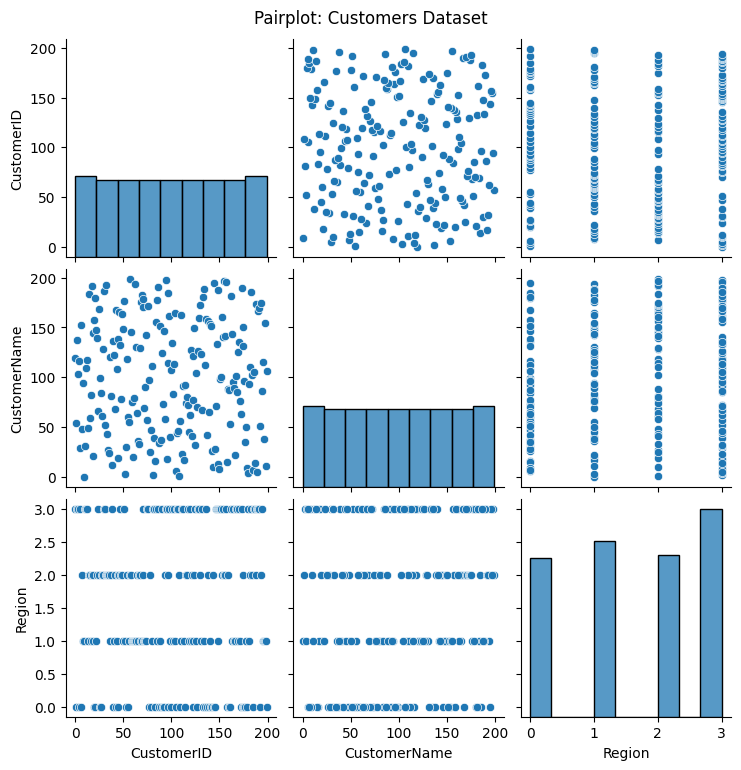

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

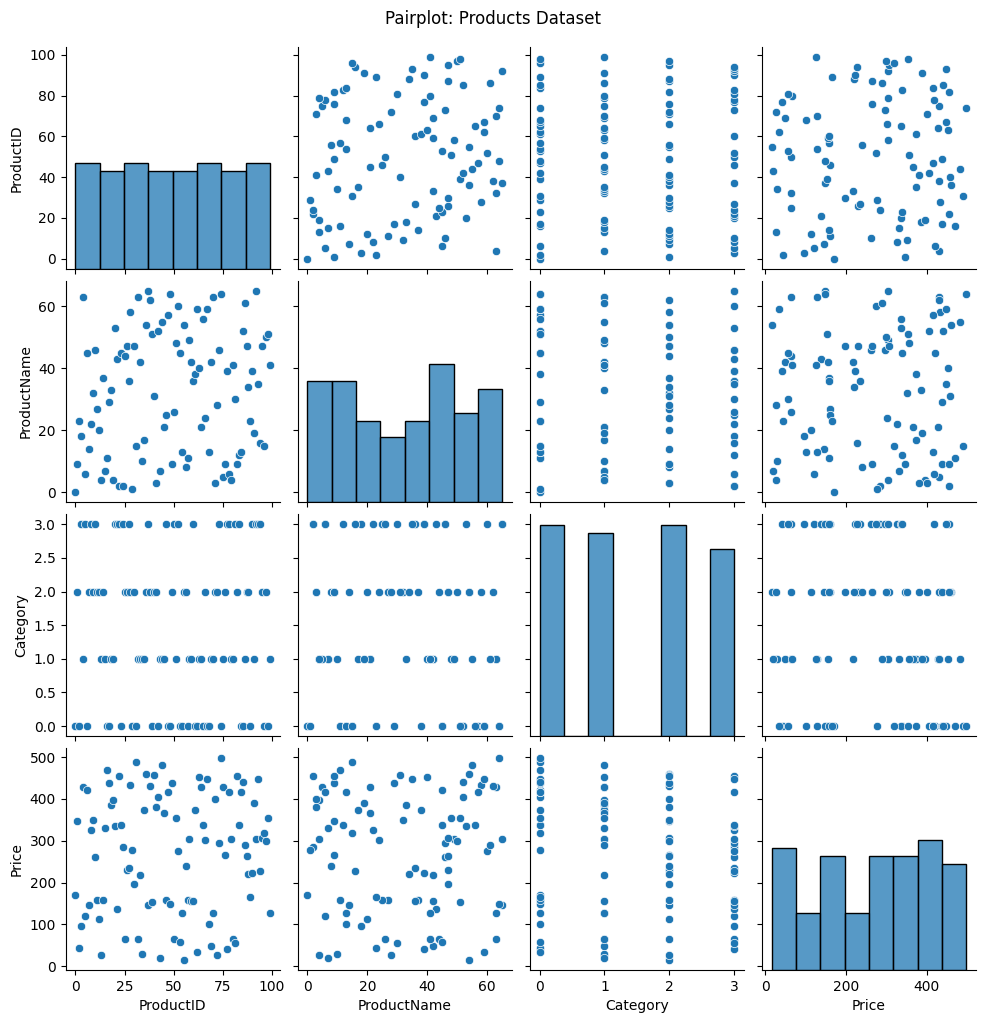

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

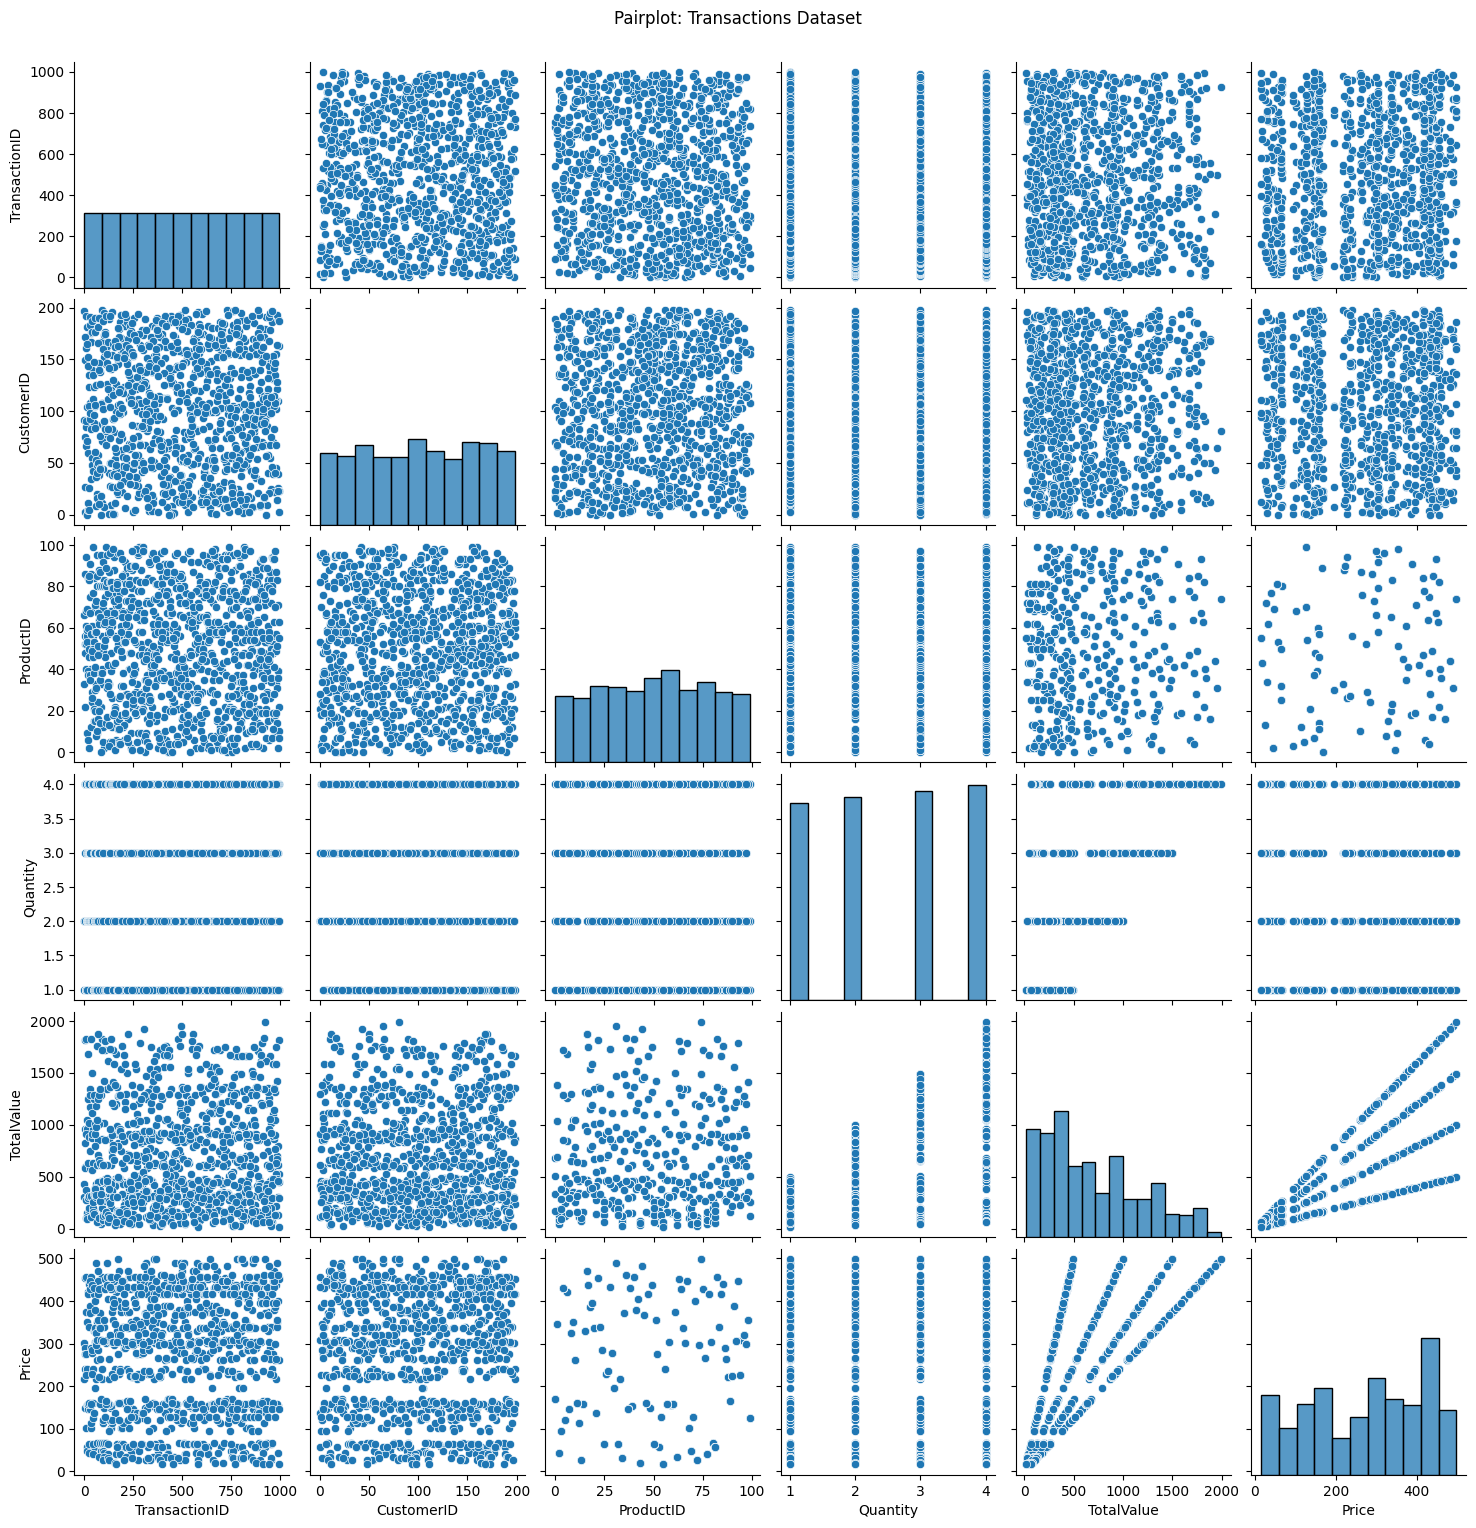

In [27]:
# Pairplot for all datasets
sb.pairplot(df_customer_encoded)
plt.suptitle("Pairplot: Customers Dataset", y=1.02)
plt.show()

sb.pairplot(df_product_encoded)
plt.suptitle("Pairplot: Products Dataset", y=1.02)
plt.show()

sb.pairplot(df_transaction_encoded)
plt.suptitle("Pairplot: Transactions Dataset", y=1.02)
plt.show()

# Merge data of all 3 files

In [28]:
# Merge datasets
merged_data = df_transaction.merge(df_customer, on='CustomerID').merge(df_product, on='ProductID')

In [31]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


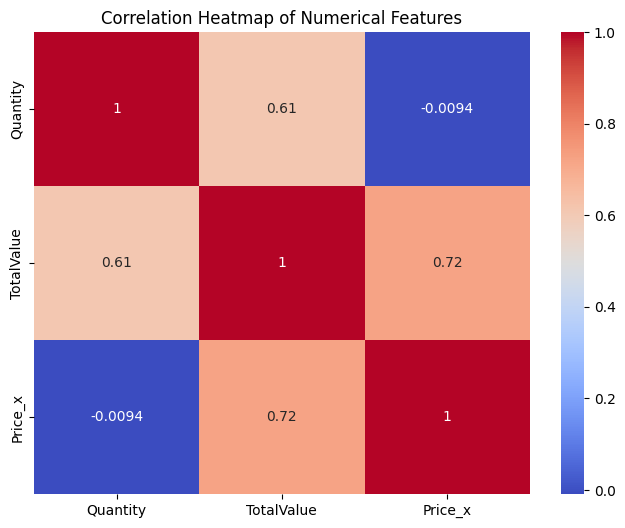

In [32]:
# Correlation heatmap for numerical features (Merged Data)
plt.figure(figsize=(8, 6))
sb.heatmap(merged_data[['Quantity', 'TotalValue', 'Price_x']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [43]:
df_customer = df_customer_encoded
df_product = df_product_encoded 
df_transaction = df_transaction_encoded

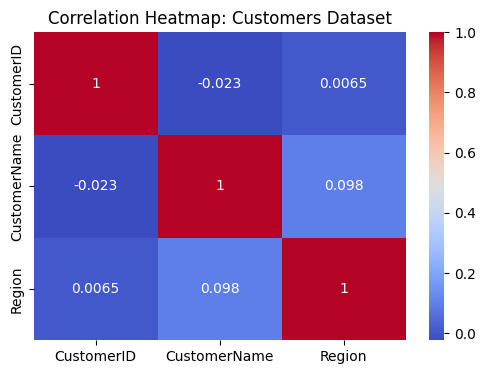

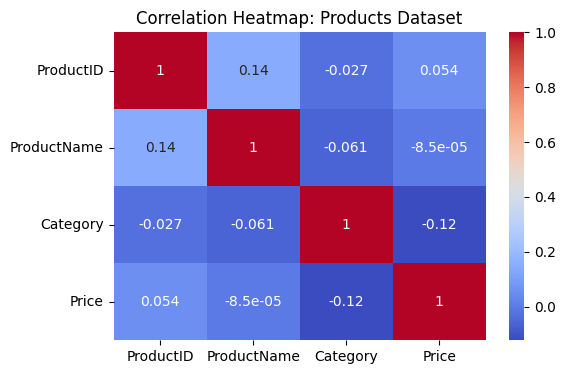

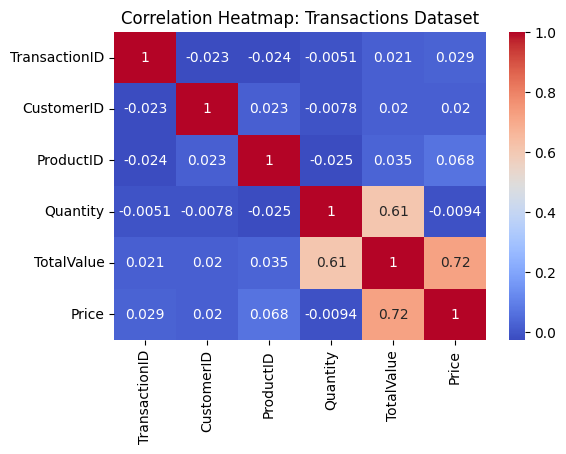

In [45]:
# Correlation heatmap for Customers dataset, Products dataset, Transactions dataset
plt.figure(figsize=(6, 4))
sb.heatmap(df_customer.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Customers Dataset")
plt.show()

plt.figure(figsize=(6, 4))
sb.heatmap(df_product.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Products Dataset")
plt.show()

plt.figure(figsize=(6, 4))
sb.heatmap(df_transaction.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Transactions Dataset")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

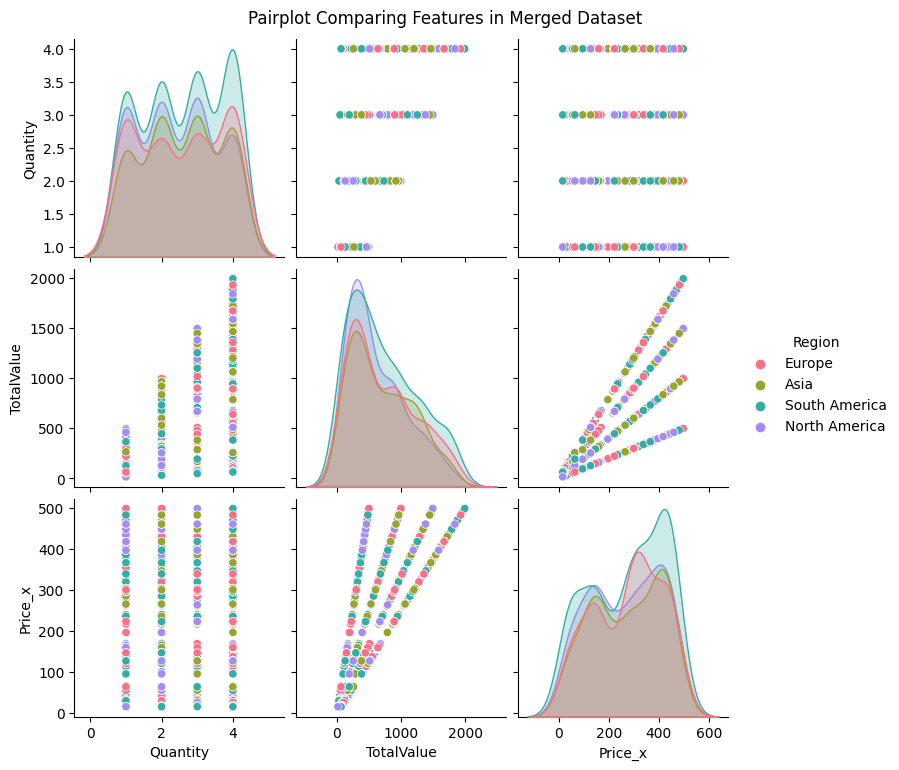

In [47]:
# Pairplot for merged dataset to compare features
sb.pairplot(merged_data, vars=['Quantity', 'TotalValue', 'Price_x'], hue='Region', palette='husl')
plt.suptitle("Pairplot Comparing Features in Merged Dataset", y=1.02)
plt.show()

In [51]:
print(merged_data.dtypes)

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price_x                   float64
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
ProductName                object
Category                   object
Price_y                   float64
MonthYear               period[M]
dtype: object


In [52]:
# Temporarily encode categorical columns as numbers/digit
merged_data_encoded = merged_data.copy()

for col in merged_data.select_dtypes(include=['object']).columns:
    merged_data_encoded[col] = merged_data_encoded[col].astype('category').cat.codes

In [53]:
merged_data = merged_data_encoded

# Analysis of trends in the data

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


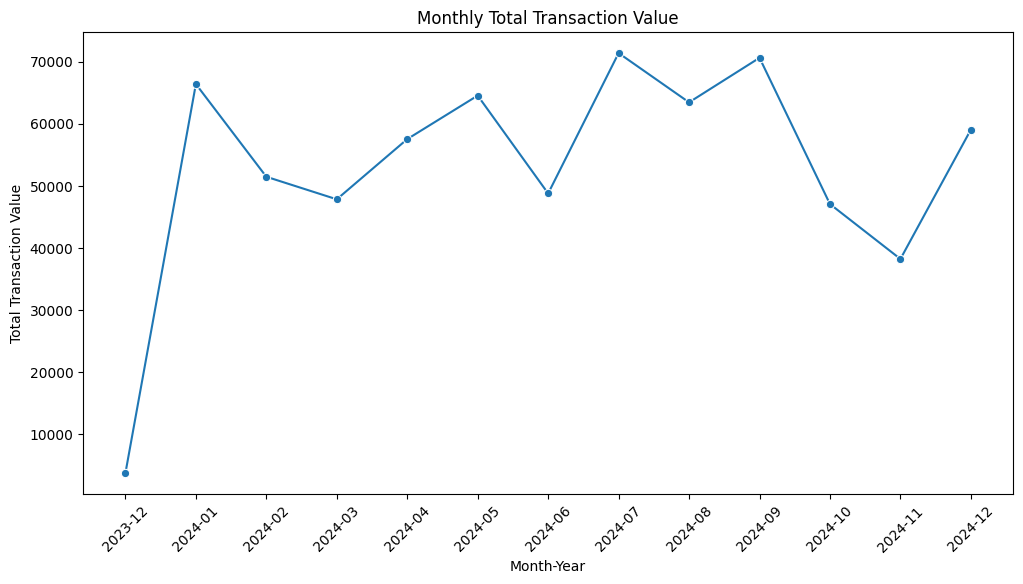

In [59]:
# Convert 'MonthYear' to string for Seaborn compatibility
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M').astype(str)

# Monthly transaction trends
plt.figure(figsize=(12, 6))
sb.lineplot(data=merged_data.groupby('MonthYear')['TotalValue'].sum().reset_index(), 
            x='MonthYear', y='TotalValue', marker='o')
plt.title("Monthly Total Transaction Value")
plt.xlabel("Month-Year")
plt.ylabel("Total Transaction Value")
plt.xticks(rotation=45)
plt.show()

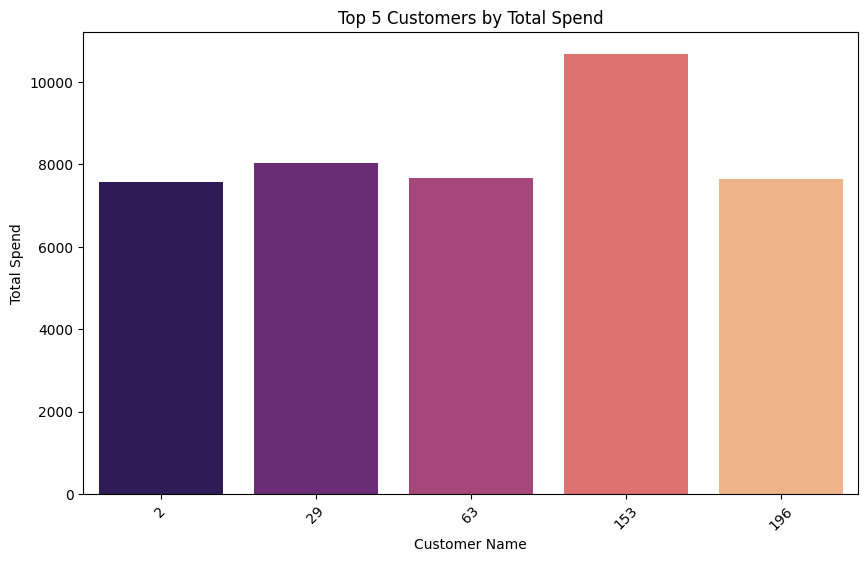

In [61]:
# Top 5 customers by total spend
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().nlargest(5).reset_index()
plt.figure(figsize=(10, 6))
sb.barplot(data=top_customers, x='CustomerName', y='TotalValue', palette='magma')
plt.title("Top 5 Customers by Total Spend")
plt.xlabel("Customer Name")
plt.ylabel("Total Spend")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


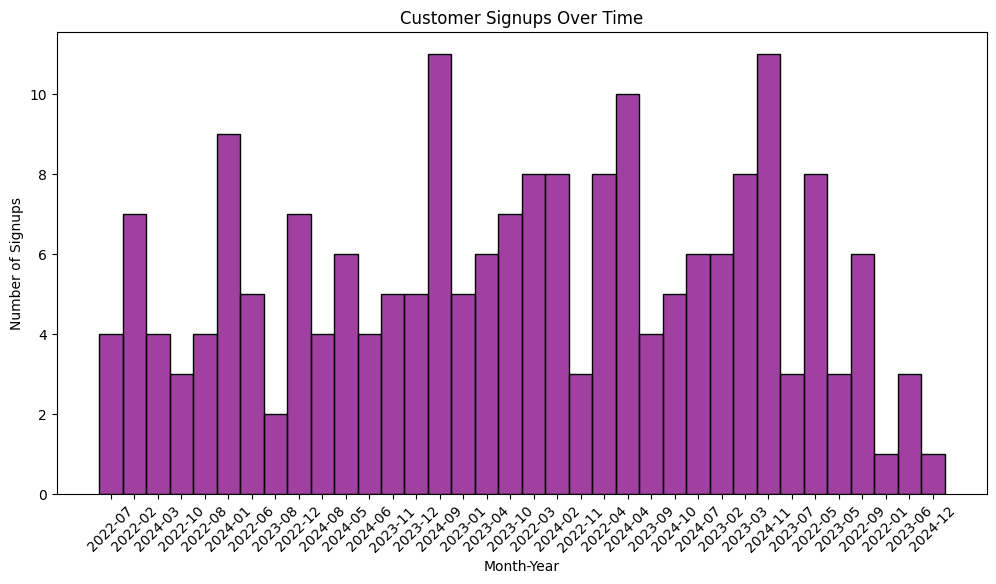

In [62]:
# Signup trends over time
df_customer['SignupMonthYear'] = df_customer['SignupDate'].dt.to_period('M')
plt.figure(figsize=(12, 6))
sb.histplot(df_customer['SignupMonthYear'].astype(str), bins=20, kde=False, color='purple')
plt.title("Customer Signups Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()

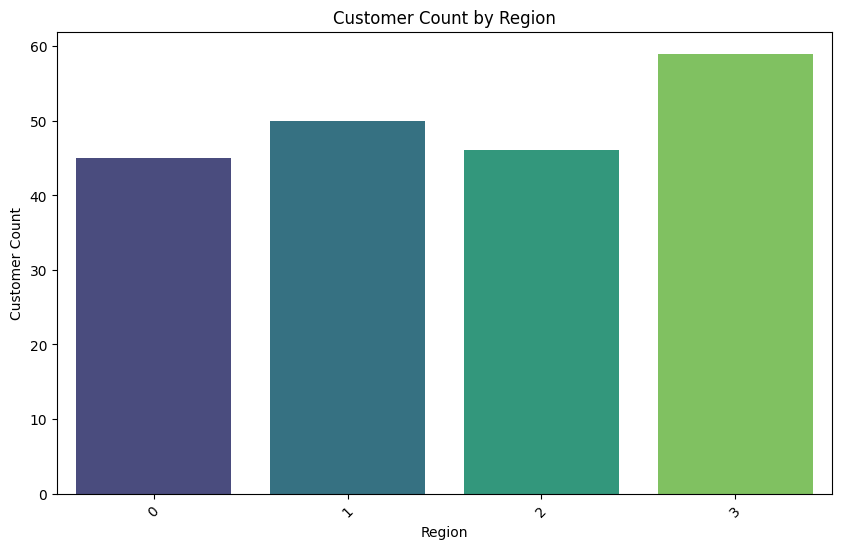

In [64]:
# Region-wise customer count
region_customer_count = df_customer['Region'].value_counts().reset_index()
region_customer_count.columns = ['Region', 'CustomerCount']  # Rename columns for clarity

plt.figure(figsize=(10, 6))
sb.barplot(data=region_customer_count, x='Region', y='CustomerCount', palette='viridis')
plt.title("Customer Count by Region")
plt.xlabel("Region")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()

In [65]:
# Displaying summary statistics
print("Summary Statistics for Merged Data:")
print(merged_data.describe(include='all'))

Summary Statistics for Merged Data:
        TransactionID   CustomerID    ProductID  \
count     1000.000000  1000.000000  1000.000000   
unique            NaN          NaN          NaN   
top               NaN          NaN          NaN   
freq              NaN          NaN          NaN   
mean       499.500000   100.192000    49.574000   
min          0.000000     0.000000     0.000000   
25%        249.750000    50.000000    26.000000   
50%        499.500000   101.000000    50.000000   
75%        749.250000   152.000000    73.000000   
max        999.000000   198.000000    99.000000   
std        288.819436    57.187162    27.723981   

                      TransactionDate     Quantity   TotalValue     Price_x  \
count                            1000  1000.000000  1000.000000  1000.00000   
unique                            NaN          NaN          NaN         NaN   
top                               NaN          NaN          NaN         NaN   
freq                              N

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
